<a href="https://colab.research.google.com/github/AmineHamzaoui/Financial-Market-Forcesating/blob/master/ARIMA_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Successfully uninstalled statsmodels-0.14.4
Files removed: 0
Using pip 24.1.2 from /usr/local/lib/python3.11/dist-packages/pip (python 3.11)
  Link requires a different Python (3.11.12 not in: '>=3.7,<3.11'): https://files.pythonhosted.org/packages/3a/be/650f9c091ef71cb01d735775d554e068752d3ff63d7943b26316dc401749/numpy-1.21.2.zip (from https://pypi.org/simple/numpy/) (requires-python:>=3.7,<3.11)
  Link requires a different Python (3.11.12 not in: '>=3.7,<3.

Colonnes disponibles : Index(['Index', 'Date_x', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Dividends', 'Stock Splits', 'Stock', 'Daily_Return', 'Price_Range',
       'Volatility', 'Close_Lag1', 'Open_Lag1', 'Volume_Change', 'DateOnly_x',
       'Month', 'Date_y', 'Interest Rate (Federal Funds)', 'Unemployment Rate',
       'Consumer Price Index (CPI)', 'GDP Growth (Real GDP % Change)',
       'Inflation (PCE Index)', 'DateOnly_y'],
      dtype='object')
Stocks uniques : ['A' 'WMT' 'UDR' 'PG' 'PFE' 'NEM' 'MPC' 'JPM' 'HLT' 'GS' 'GOOGL' 'META'
 'CVX' 'DJI' 'AAPL' 'AMD' 'AMT' 'AMZN' 'AAL' 'AWK' 'BA' 'CMS' 'APD']

Traitement du stock : A


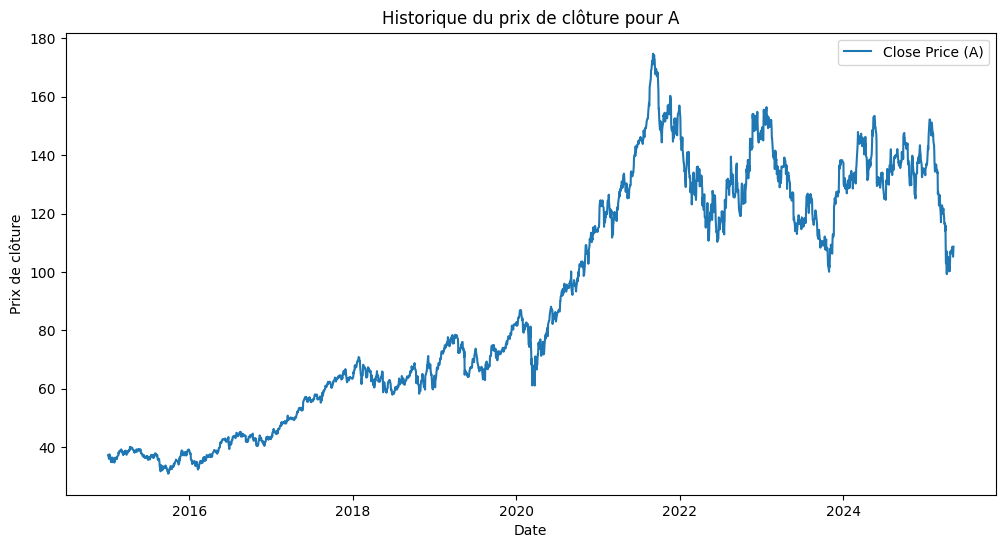

A - MSE: 482.9861, MAE: 18.3349


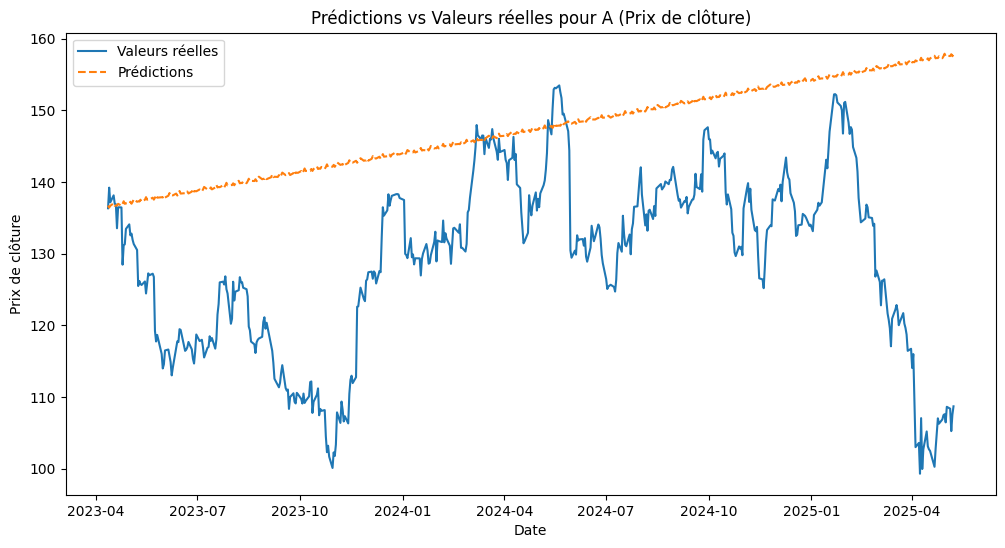


Traitement du stock : WMT


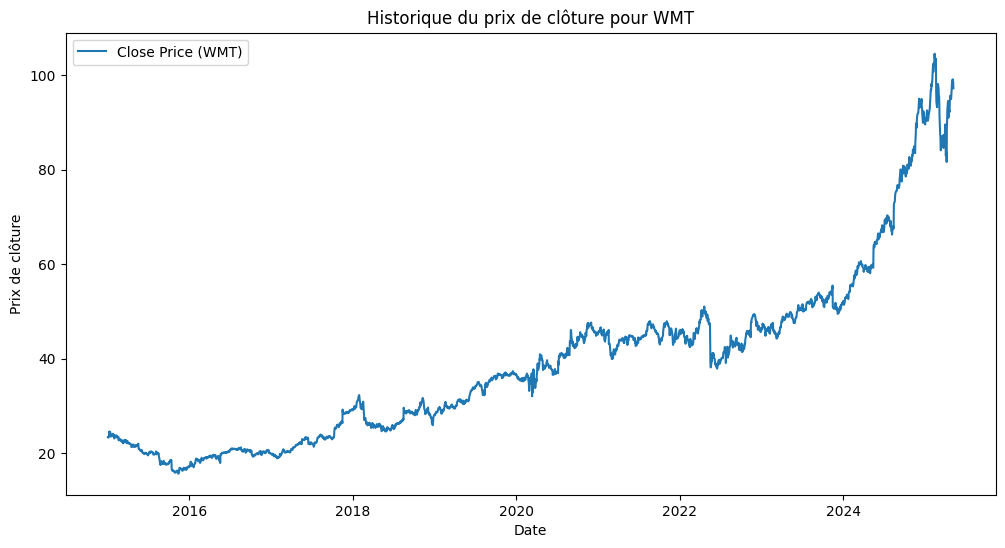

WMT - MSE: 457.4309, MAE: 15.2511


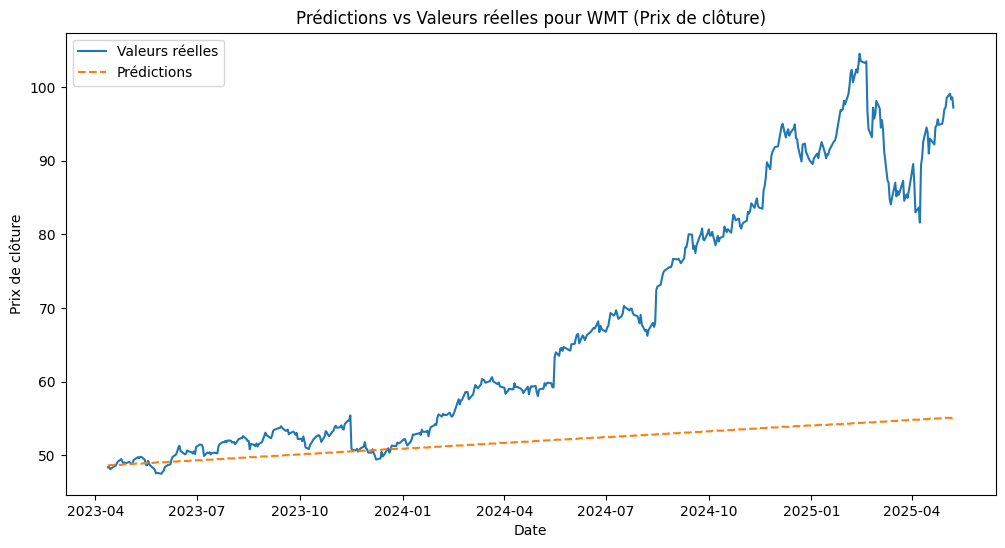


Traitement du stock : UDR


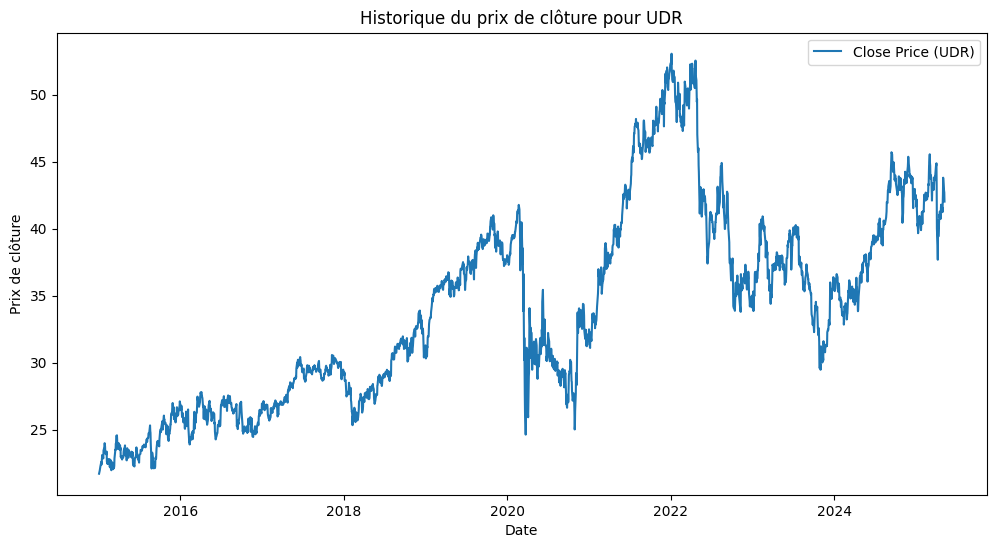

UDR - MSE: 14.9278, MAE: 3.2430


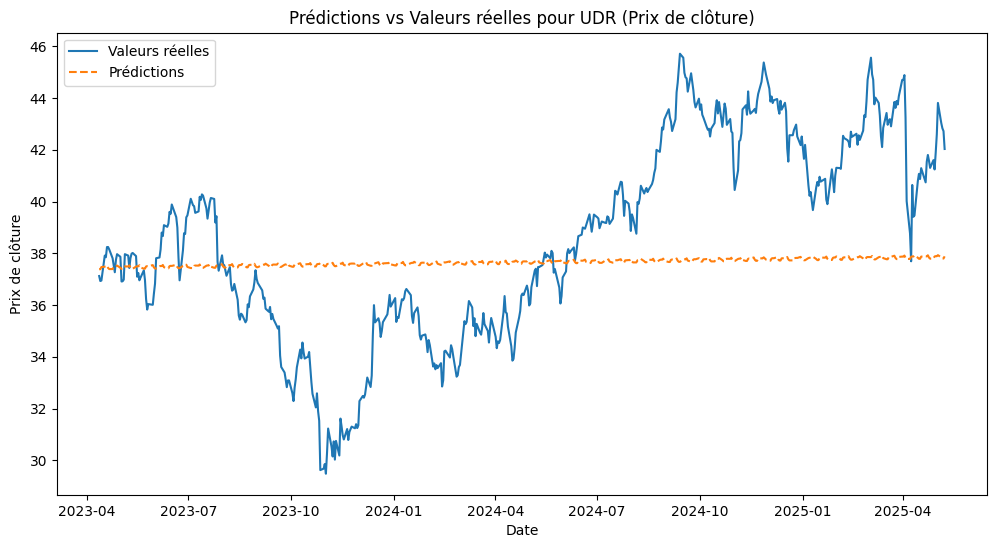


Traitement du stock : PG


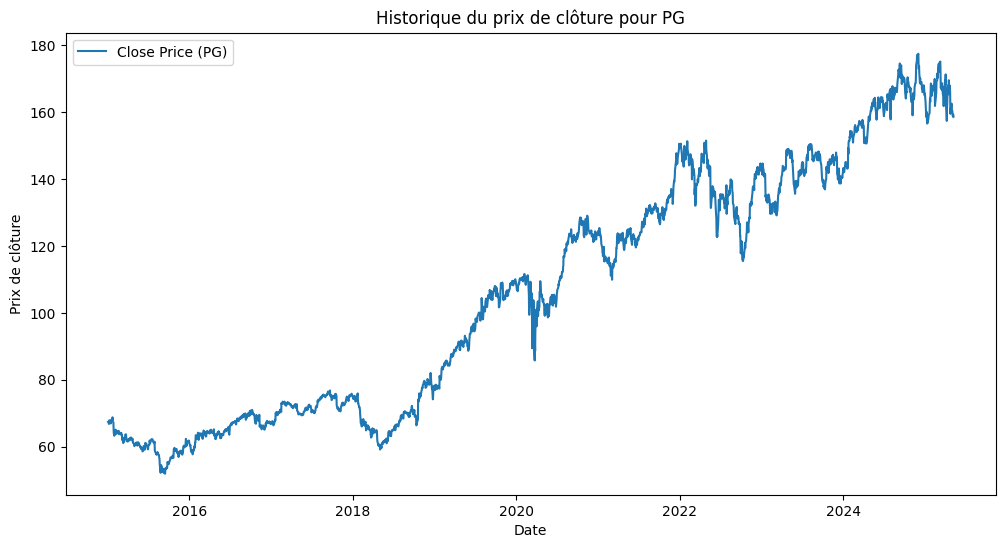

PG - MSE: 39.5528, MAE: 5.2693


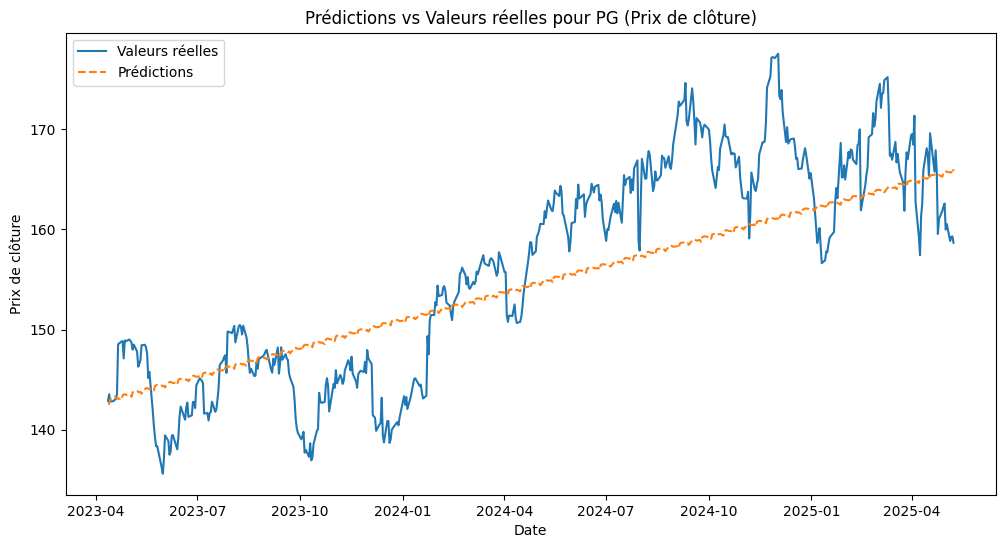


Traitement du stock : PFE


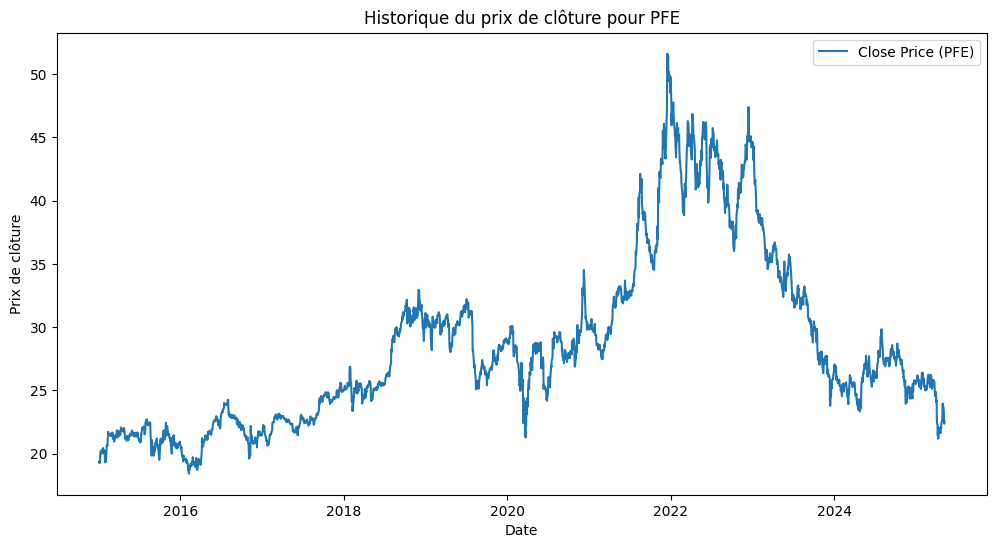

PFE - MSE: 146.1429, MAE: 11.2829


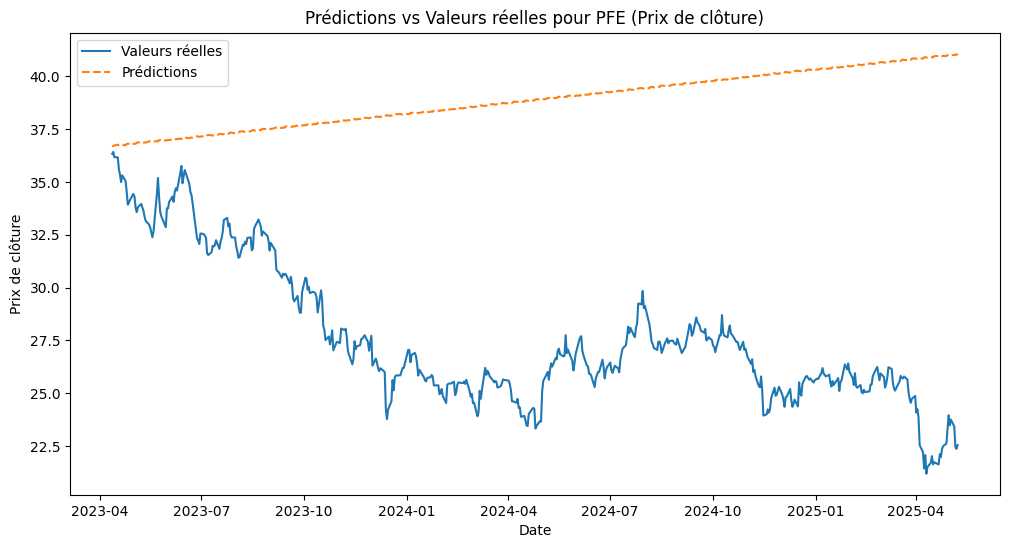


Traitement du stock : NEM


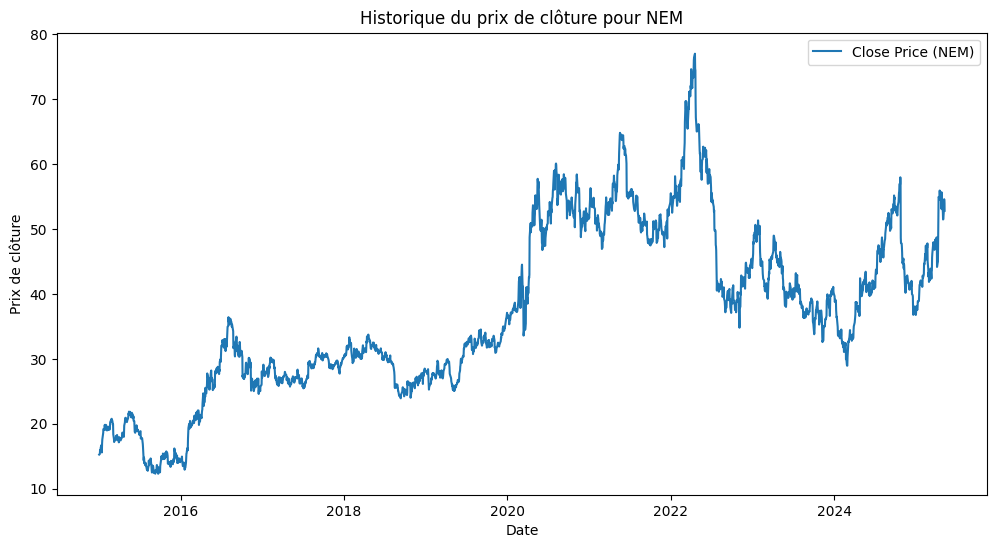

NEM - MSE: 102.9921, MAE: 8.9416


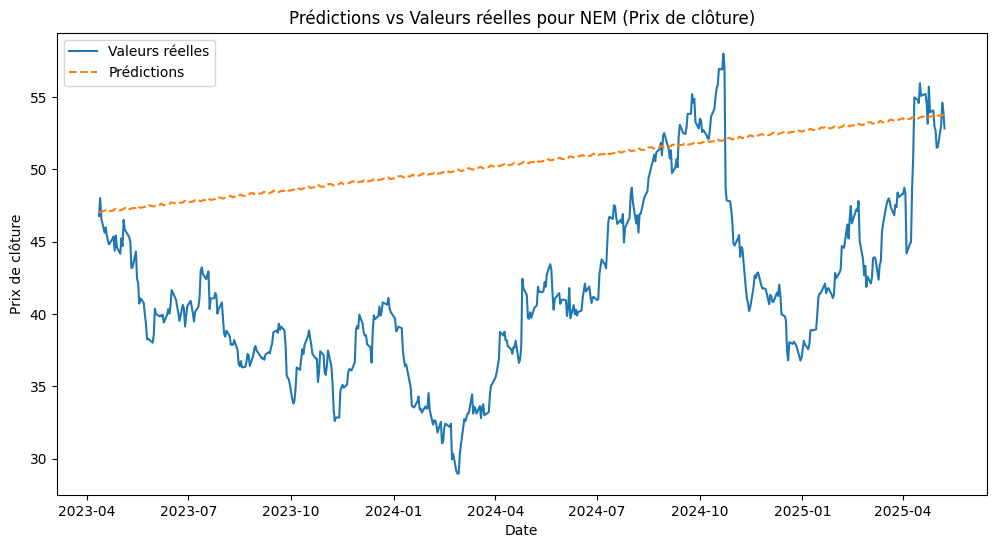


Traitement du stock : MPC


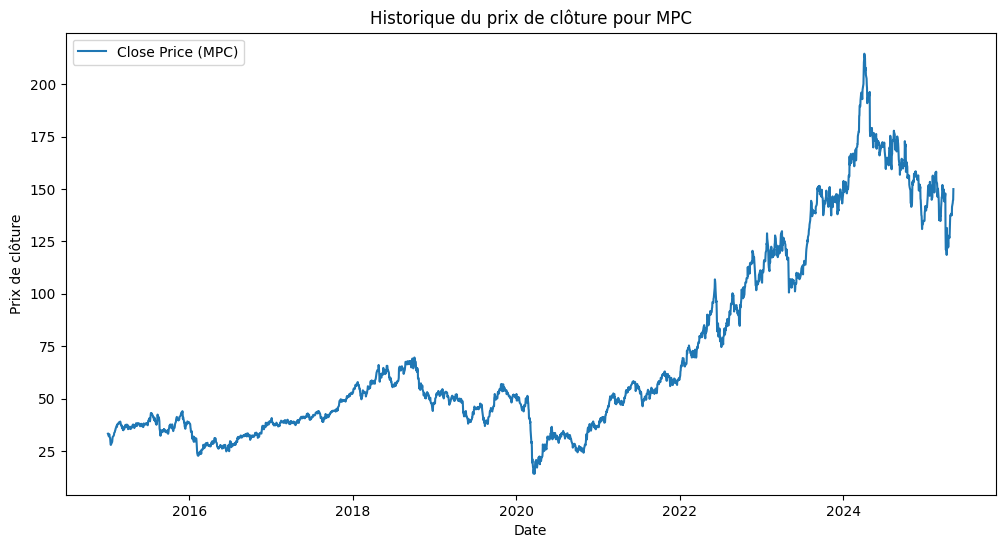

MPC - MSE: 480.6113, MAE: 17.2832


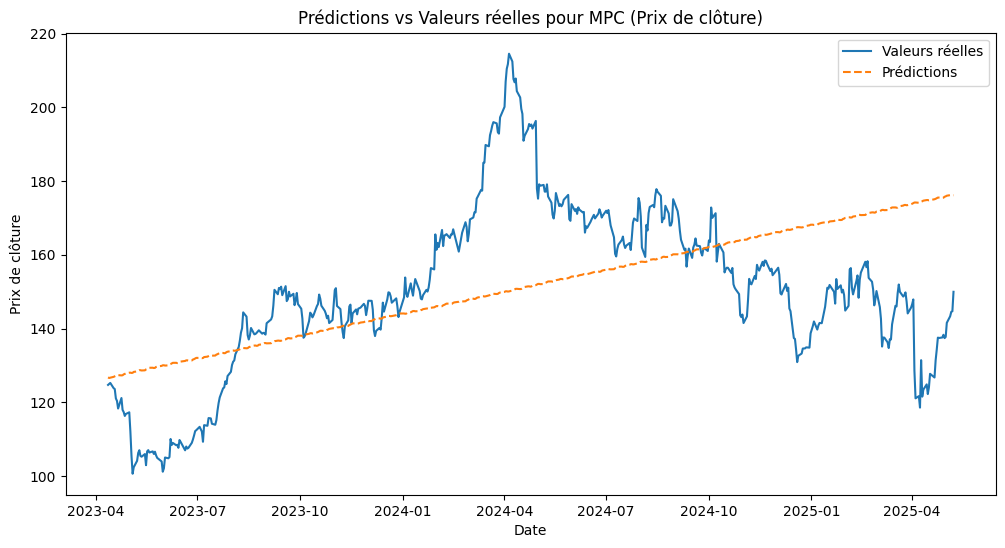


Traitement du stock : JPM


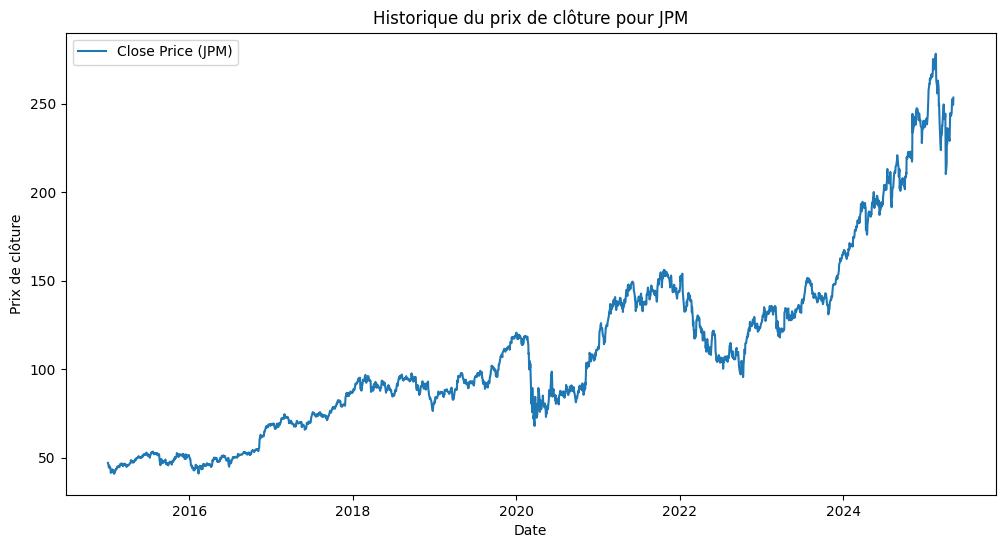

JPM - MSE: 4848.0582, MAE: 58.3735


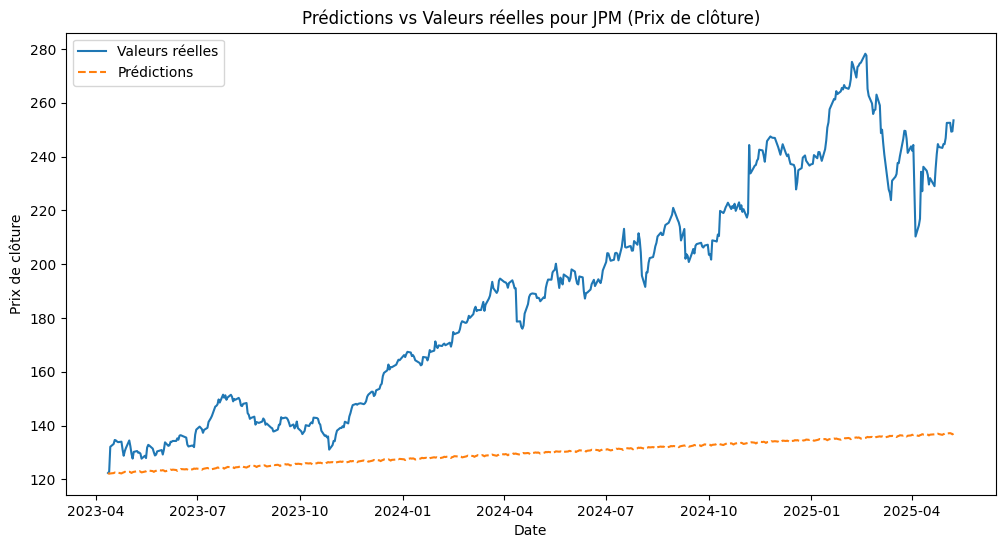


Traitement du stock : HLT


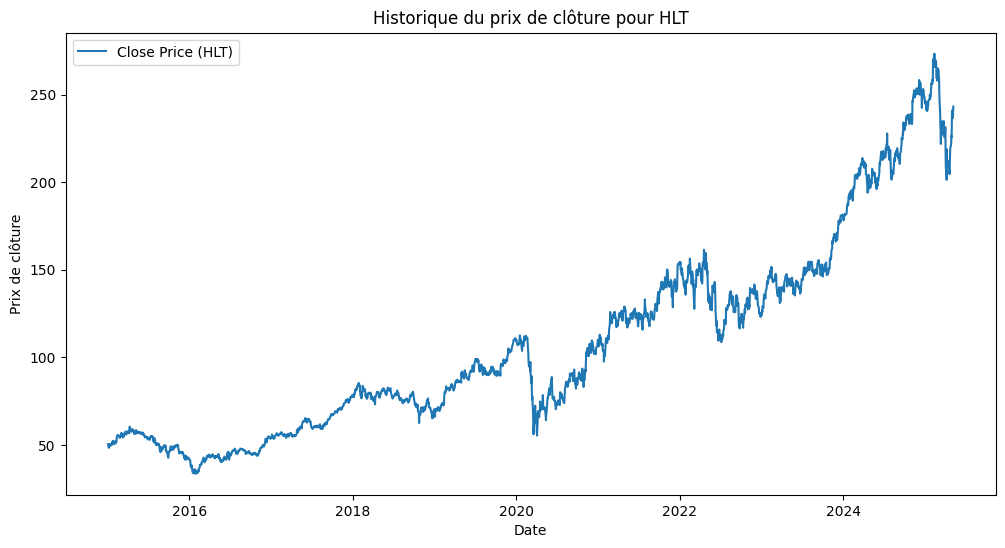

HLT - MSE: 2996.5232, MAE: 44.7418


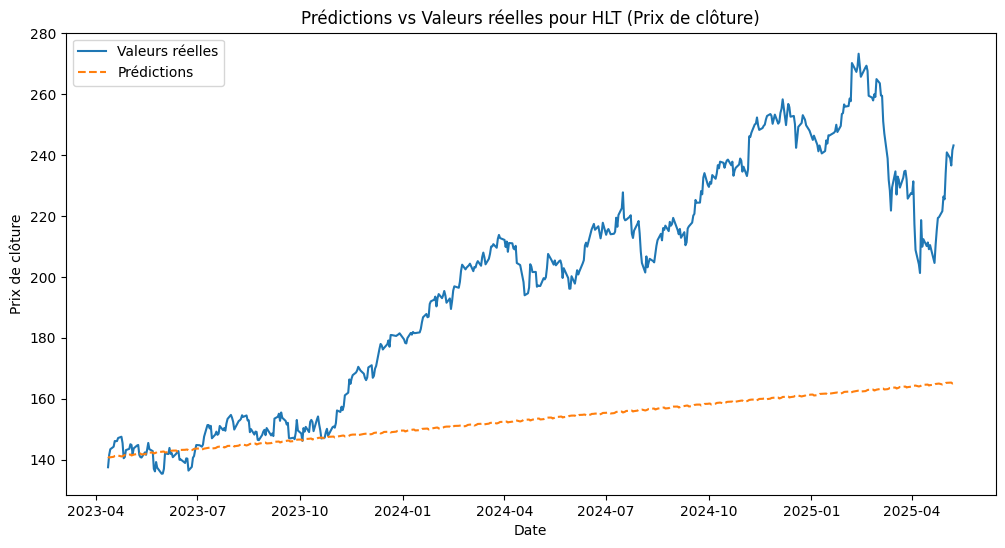


Traitement du stock : GS


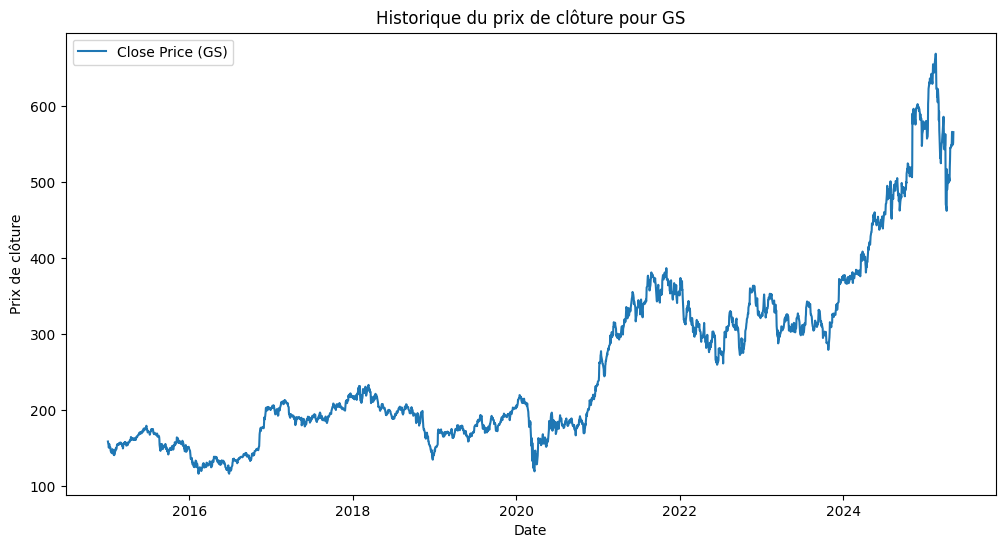

GS - MSE: 19011.9535, MAE: 104.2125


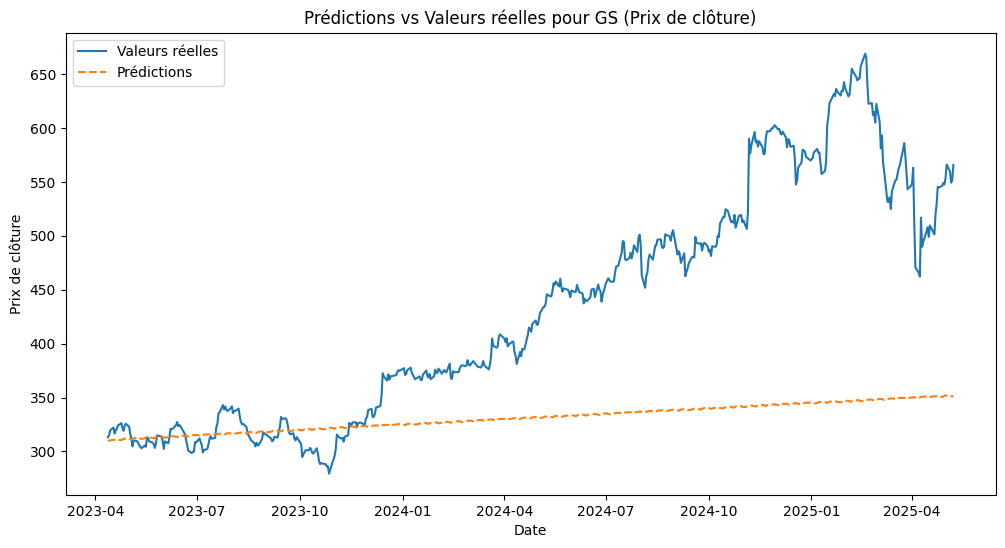


Traitement du stock : GOOGL


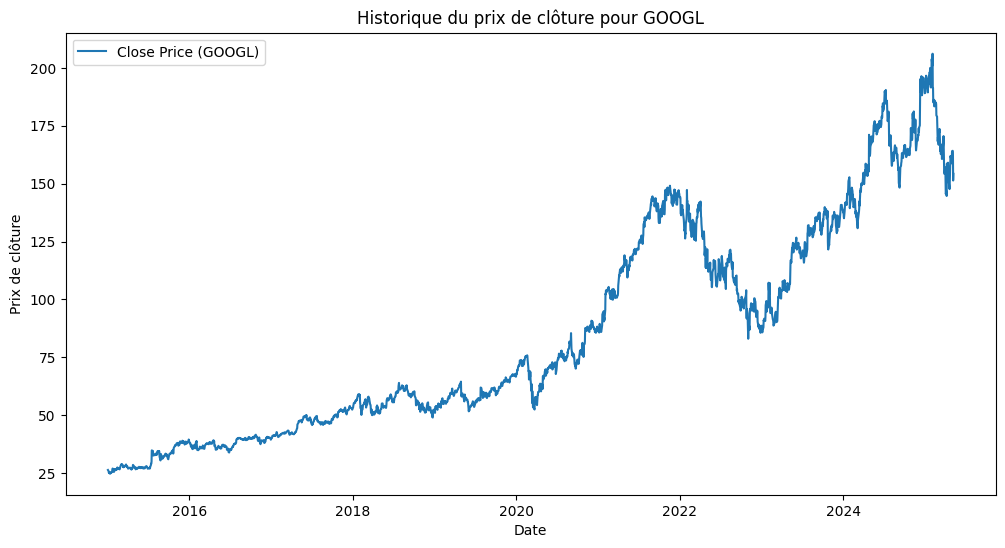

GOOGL - MSE: 1994.0783, MAE: 39.8681


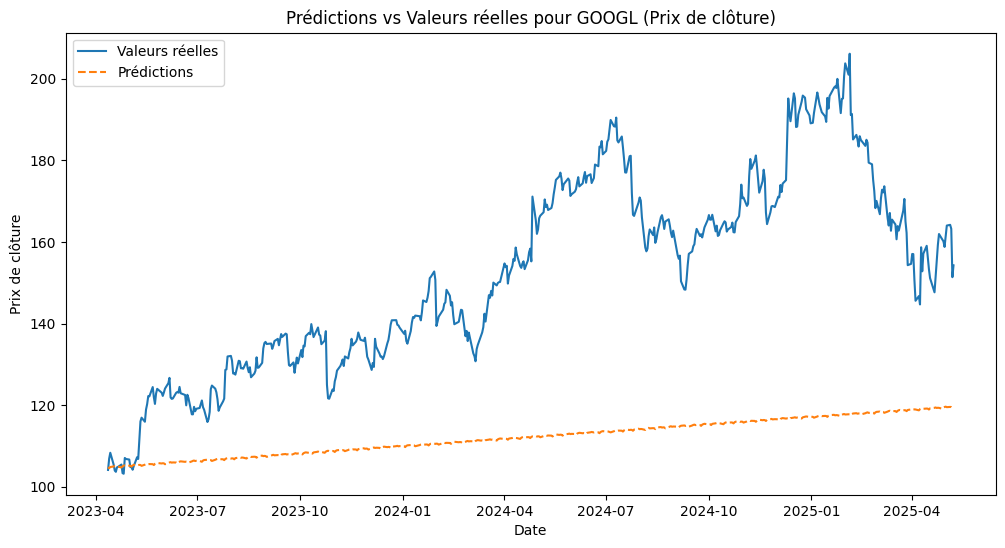


Traitement du stock : META


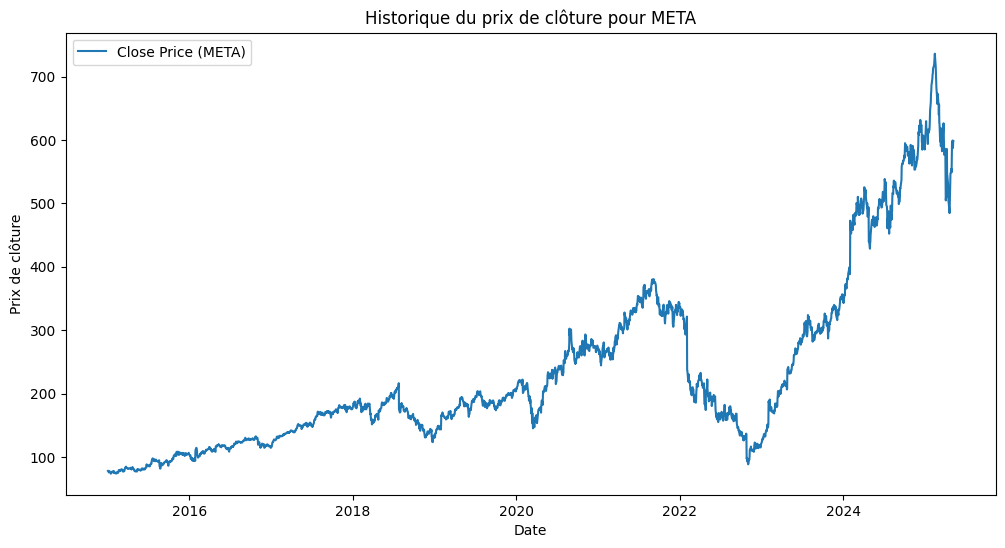

META - MSE: 64052.5190, MAE: 220.7062


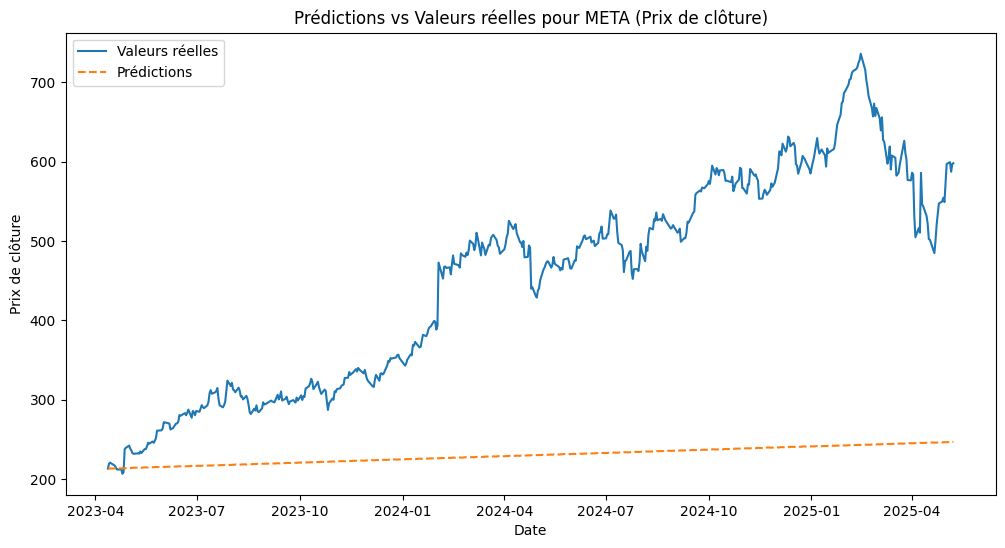


Traitement du stock : CVX


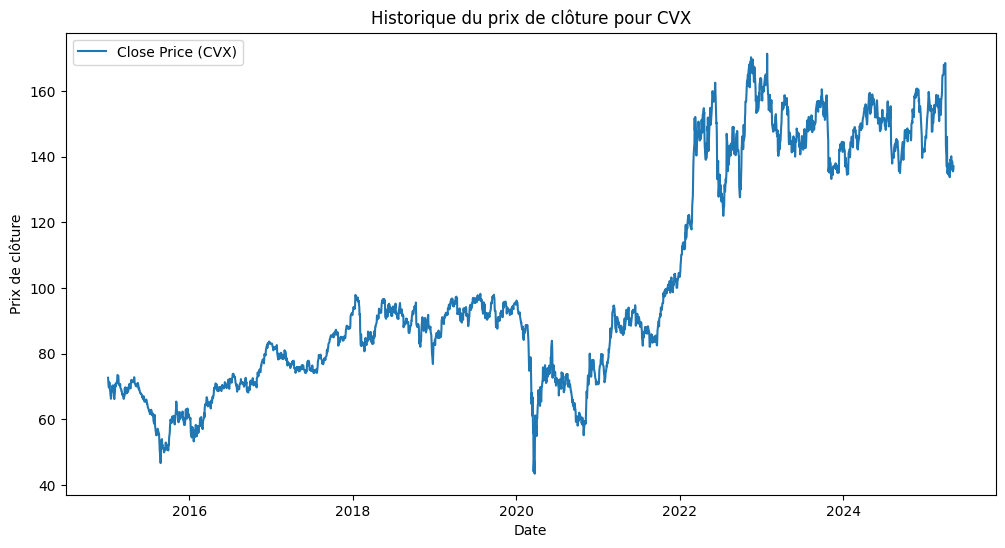

CVX - MSE: 455.8868, MAE: 19.3121


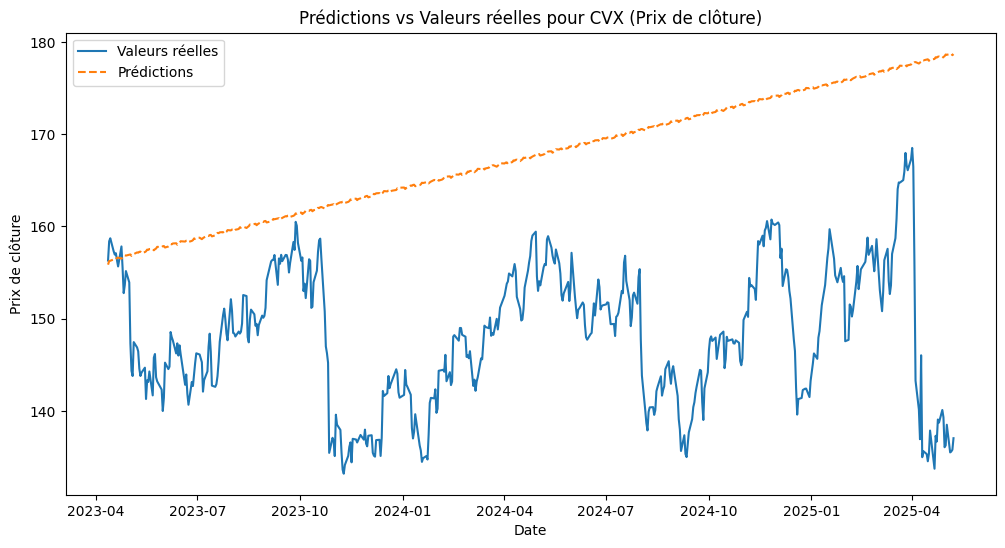


Traitement du stock : DJI


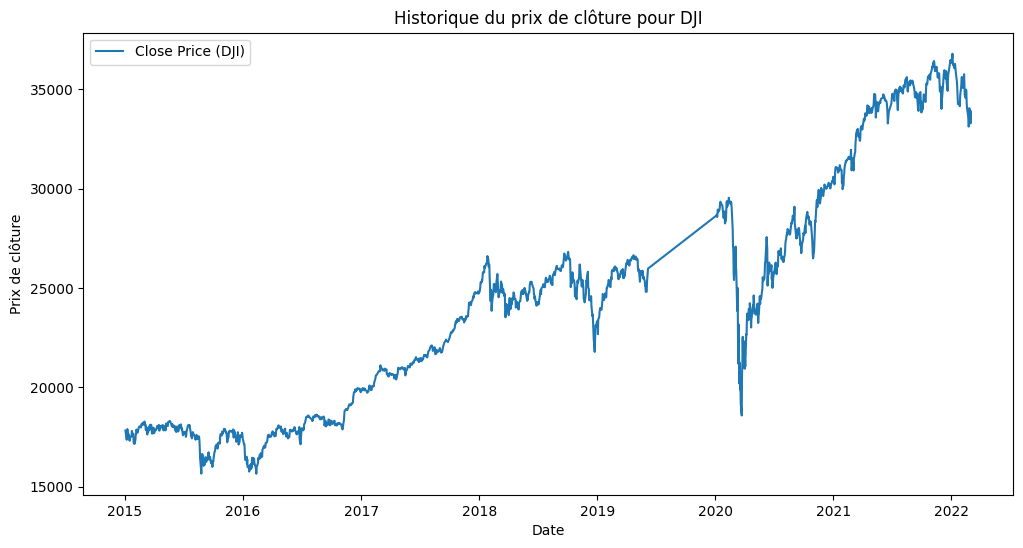

DJI - MSE: 10753779.0180, MAE: 3008.6450


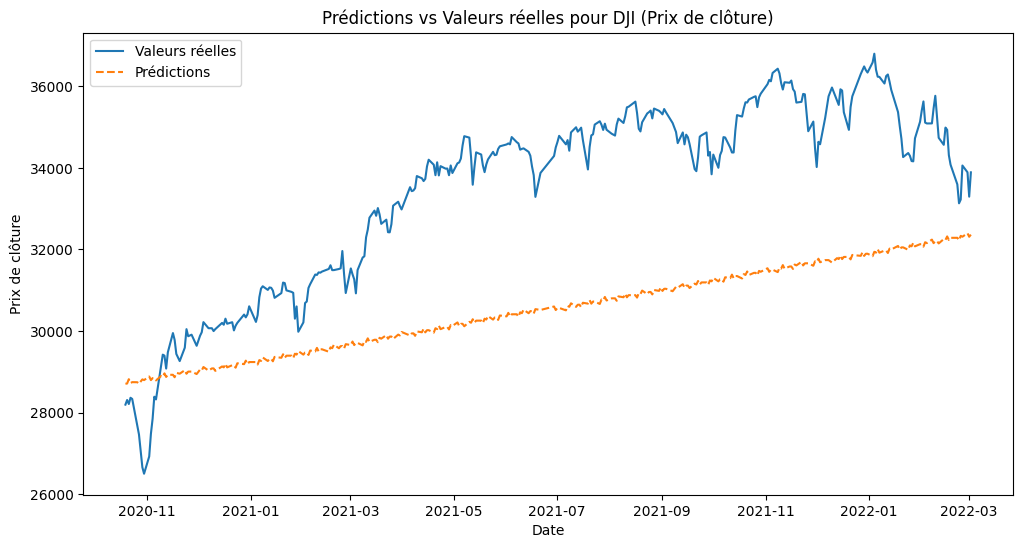


Traitement du stock : AAPL


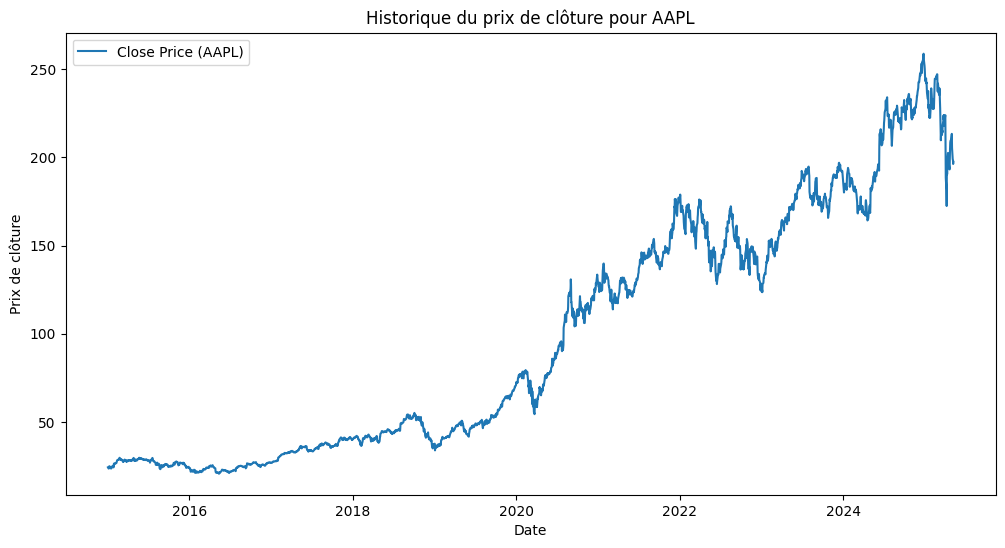

AAPL - MSE: 711.3090, MAE: 21.6858


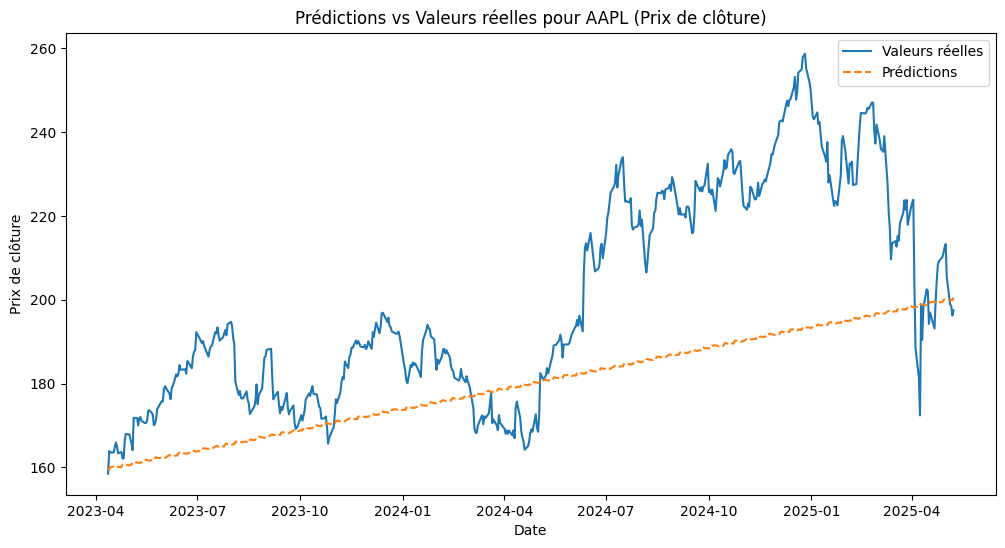


Traitement du stock : AMD


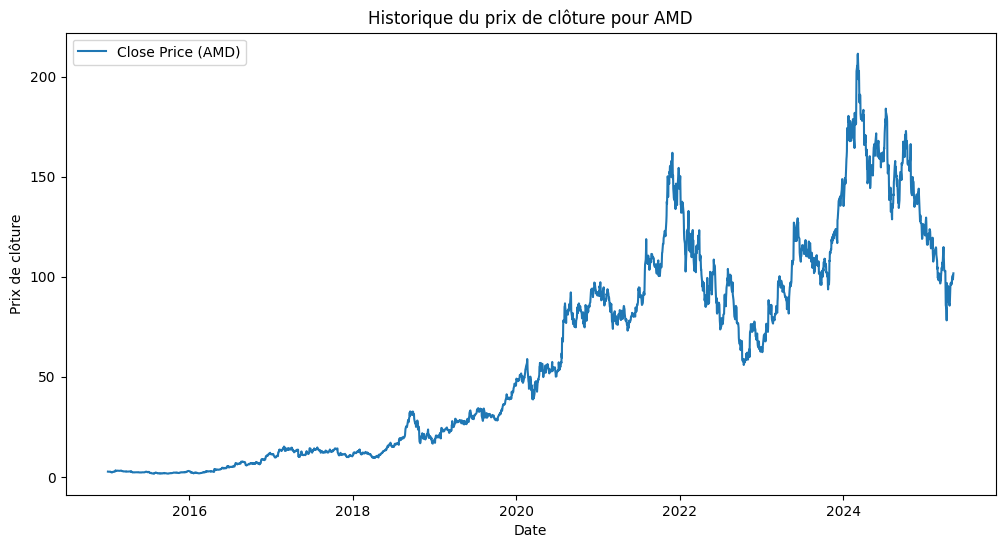

AMD - MSE: 1565.9811, MAE: 31.3346


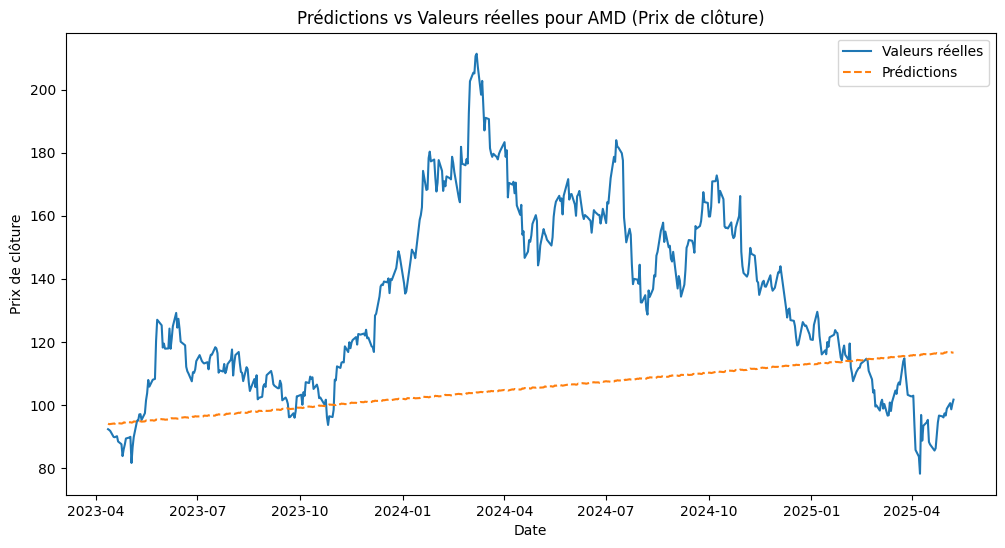


Traitement du stock : AMT


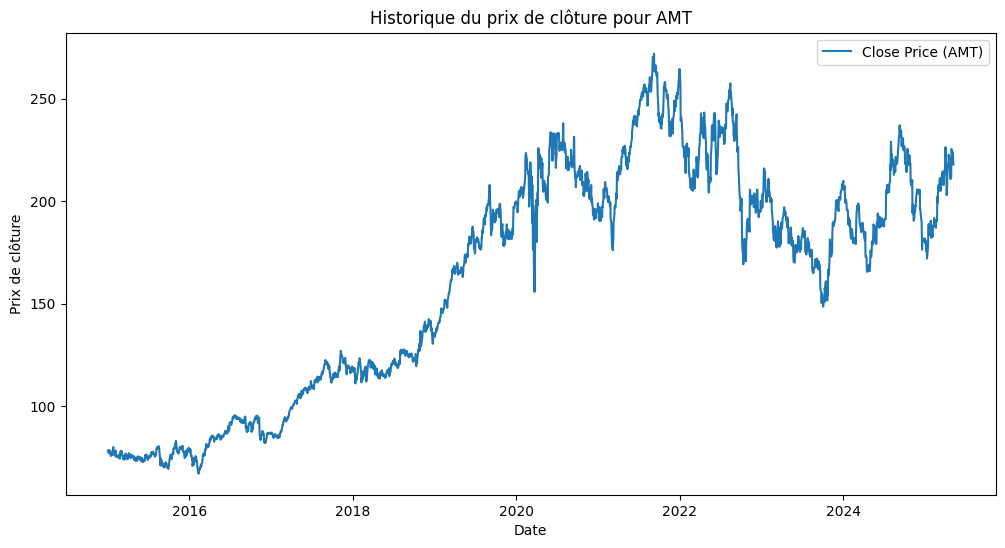

AMT - MSE: 394.3063, MAE: 16.5757


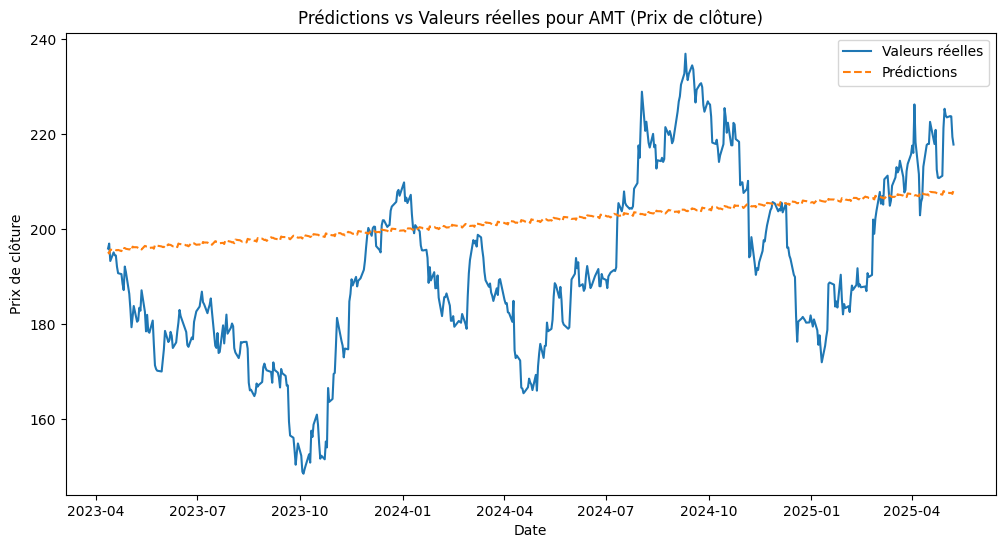


Traitement du stock : AMZN


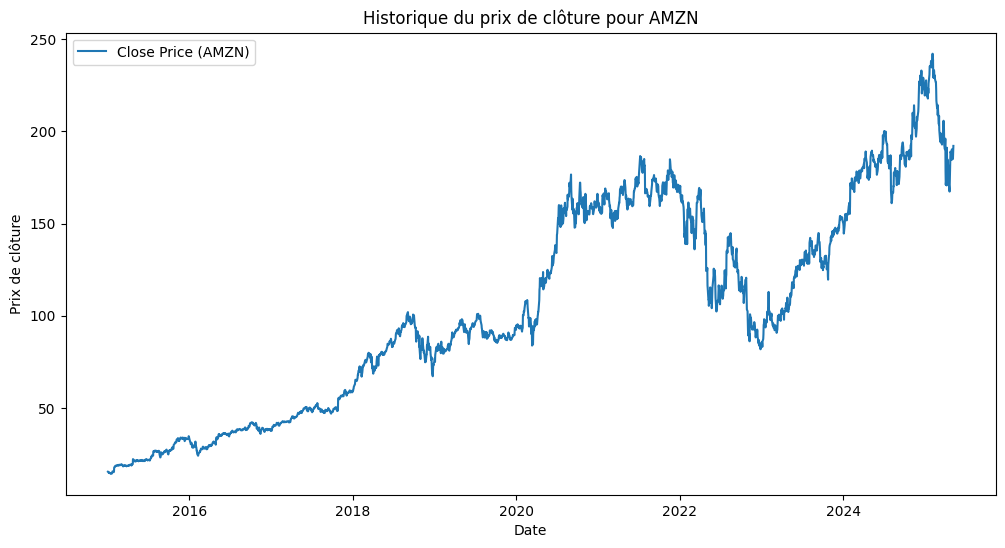

AMZN - MSE: 6820.7831, MAE: 74.2064


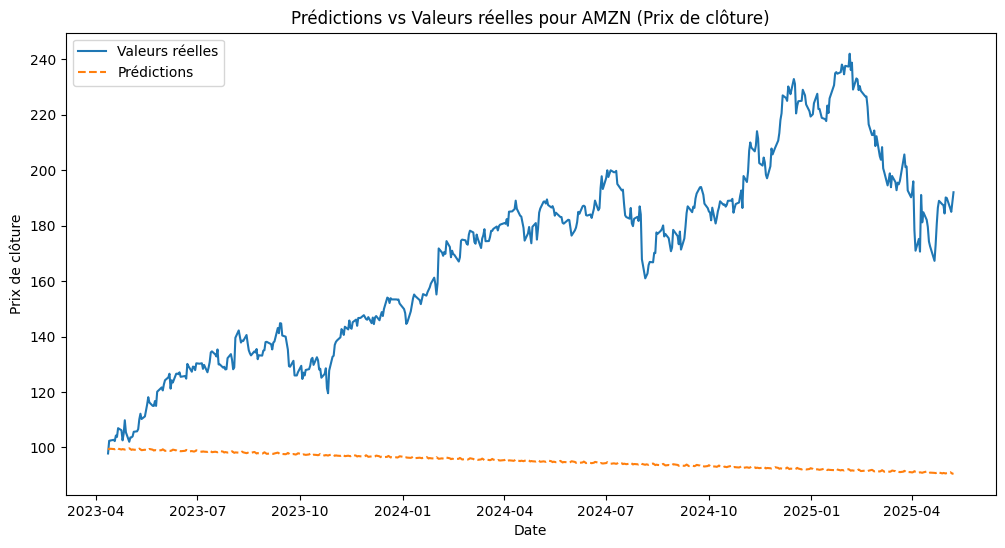


Traitement du stock : AAL


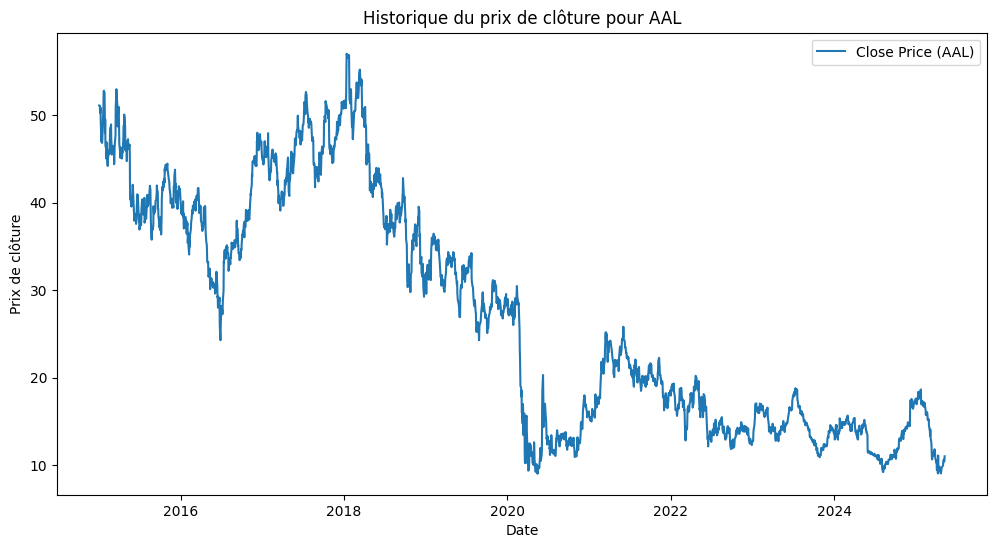

AAL - MSE: 23.2176, MAE: 3.8709


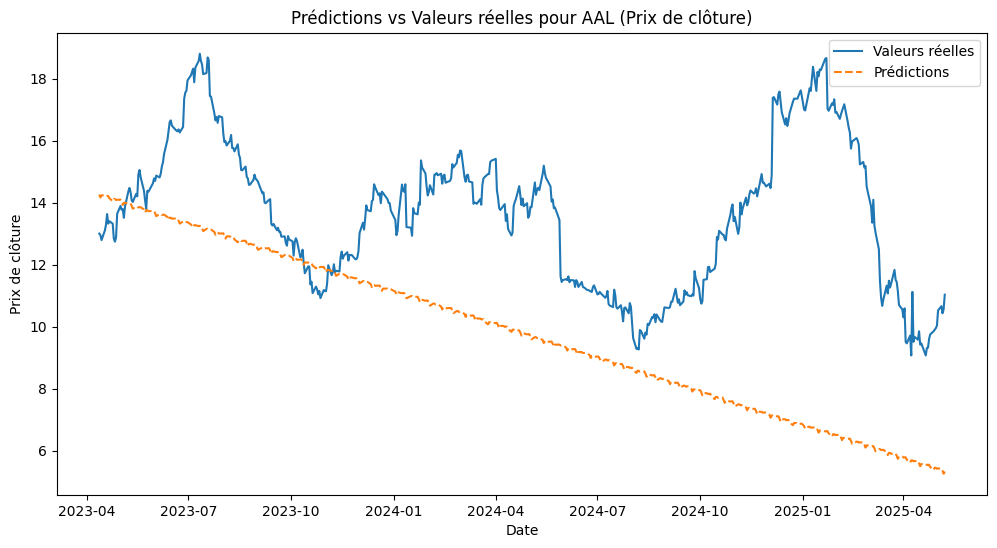


Traitement du stock : AWK


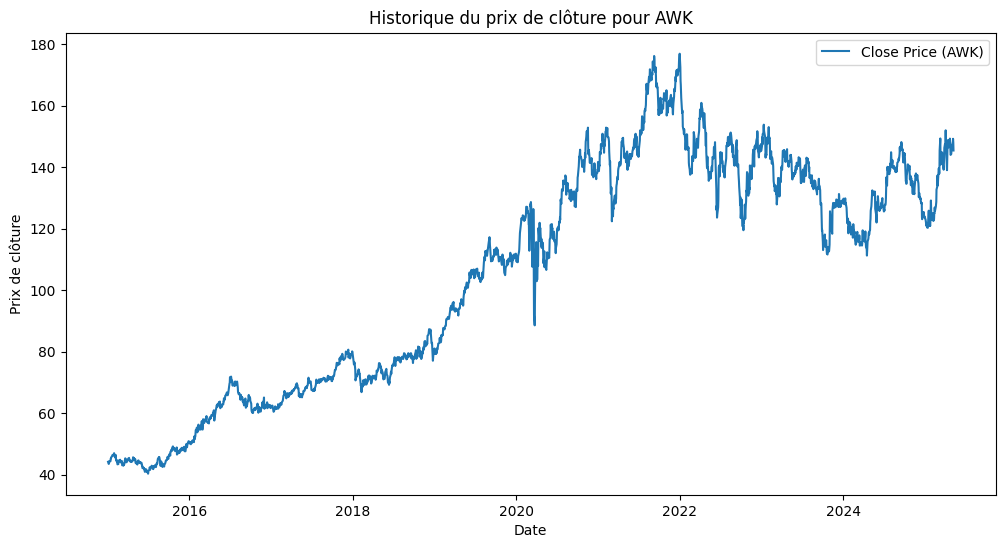

AWK - MSE: 711.8598, MAE: 24.4237


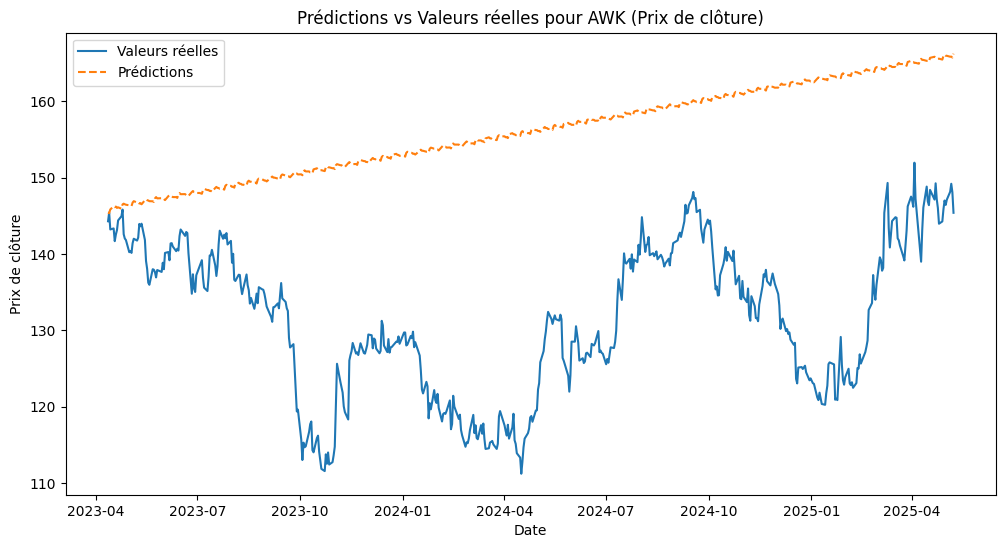


Traitement du stock : BA


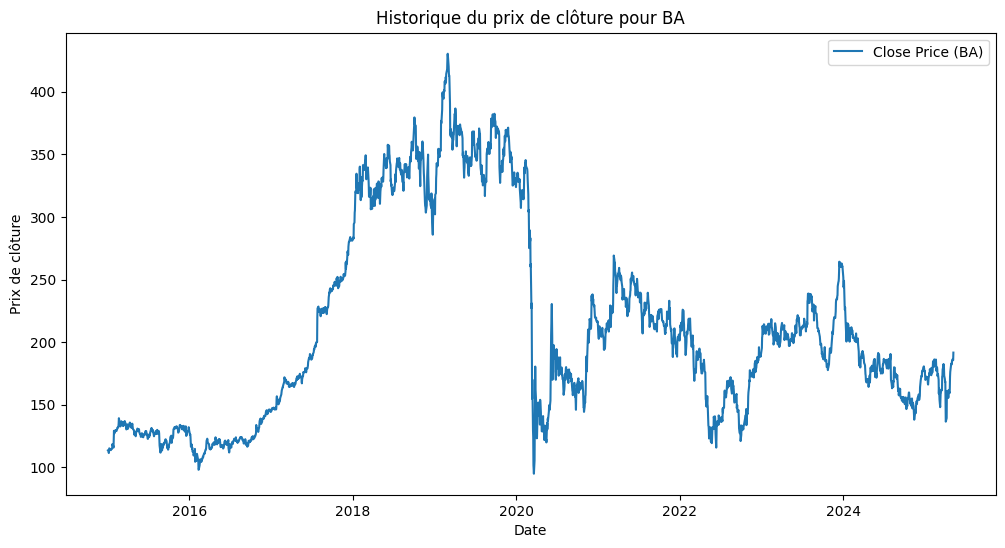

BA - MSE: 2263.6723, MAE: 40.0900


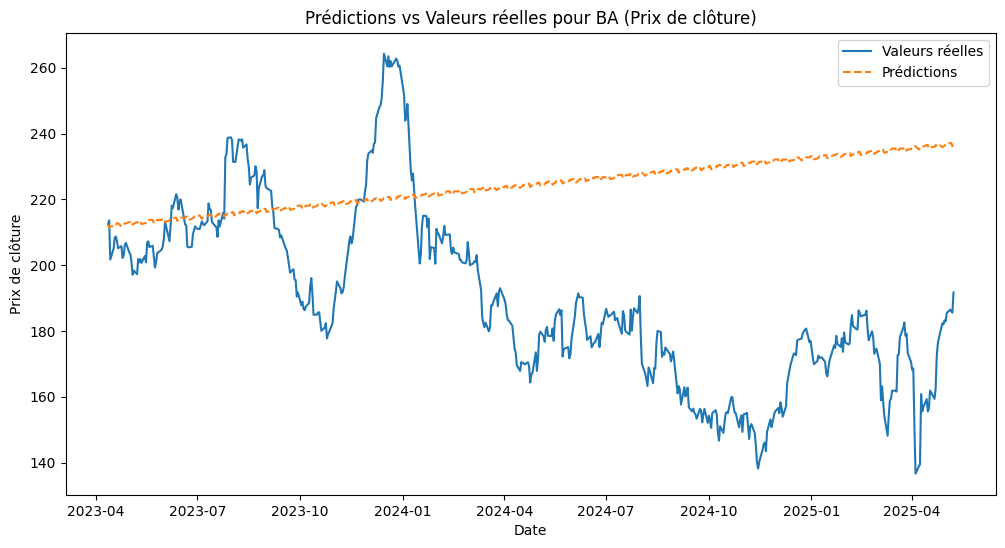


Traitement du stock : CMS


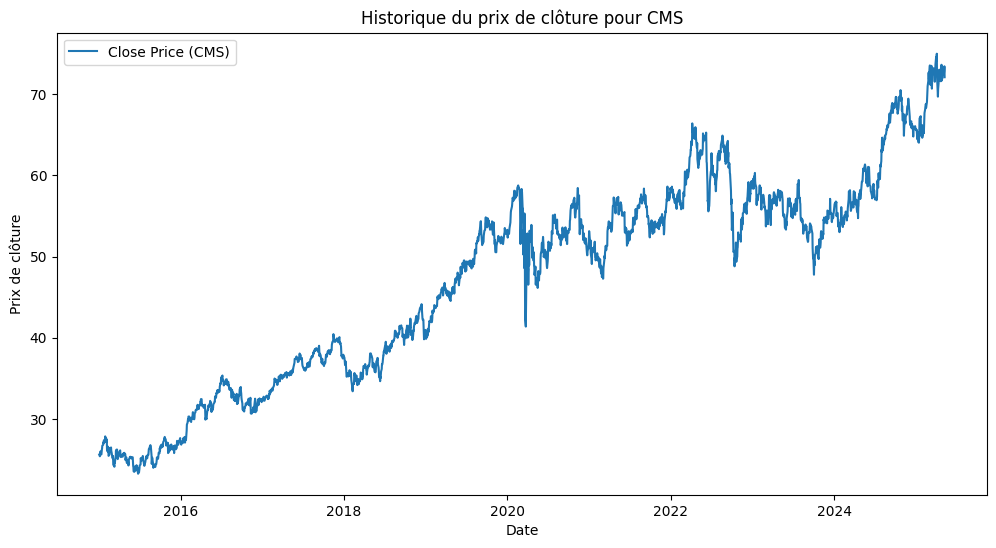

CMS - MSE: 24.3214, MAE: 4.3009


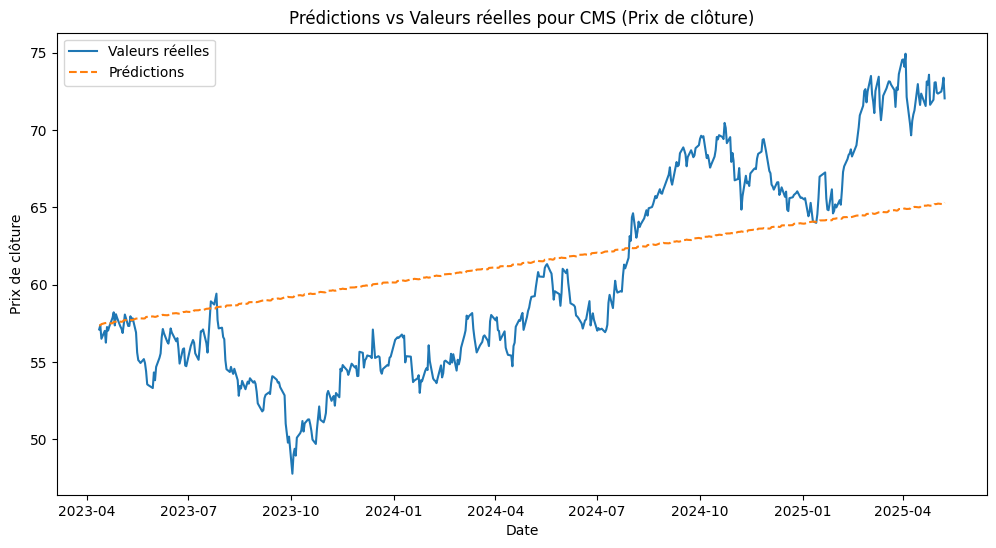


Traitement du stock : APD


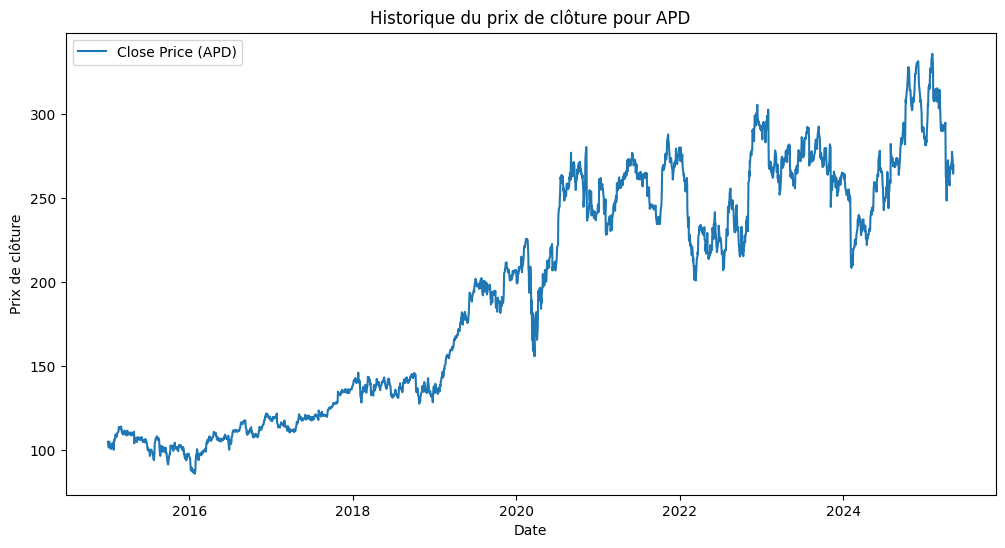

APD - MSE: 998.9511, MAE: 24.6546


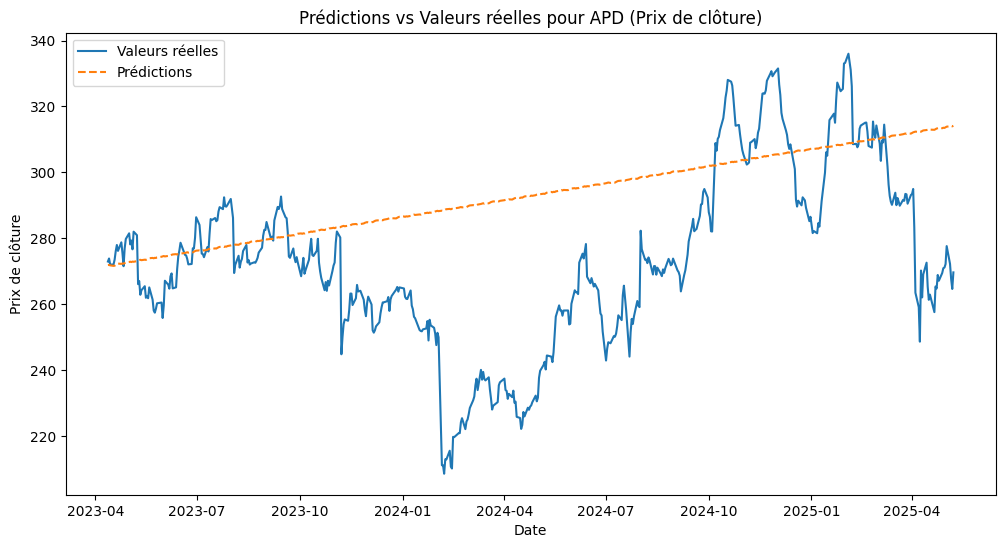

In [ ]:
# Nettoyer et installer les packages
!pip uninstall -y numpy pandas scikit-learn scipy statsmodels cython pmdarima
!pip cache purge
!pip install numpy==1.24.4 pandas==2.2.2 scikit-learn==1.5.2 scipy==1.13.1 statsmodels==0.14.4 --no-cache-dir --force-reinstall --verbose

# Importer les bibliothèques
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')



# Charger le dataset
df = pd.read_csv('/content/Macro_with_stocks.csv', sep=';')

# Inspecter les colonnes
print("Colonnes disponibles :", df.columns)

# Convertir la colonne de date
date_column = 'Date_x'
df['Date'] = pd.to_datetime(df[date_column], utc=True)
df = df.dropna(subset=['Close', 'Stock'])

# Trier par date
df = df.sort_values('Date')

# Identifier les stocks uniques
unique_stocks = df['Stock'].unique()
print(f"Stocks uniques : {unique_stocks}")

# Boucle sur chaque stock
for stock in unique_stocks:
    print(f"\nTraitement du stock : {stock}")

    # Filtrer les données pour ce stock
    df_stock = df[df['Stock'] == stock][['Date', 'Close']].copy()

    if len(df_stock) < 50:
        print(f"Pas assez de données pour {stock} ({len(df_stock)} lignes).")
        continue

    # Vérifier les valeurs infinies ou NaN
    inf_count = np.isinf(df_stock['Close']).sum()
    nan_count = df_stock['Close'].isna().sum()
    if inf_count > 0 or nan_count > 0:
        print(f"Problèmes dans Close pour {stock}: inf={inf_count}, NaN={nan_count}")
        df_stock = df_stock[~np.isinf(df_stock['Close']) & df_stock['Close'].notna()]

    if len(df_stock) < 50:
        print(f"Après nettoyage, pas assez de données pour {stock} ({len(df_stock)} lignes).")
        continue

    # Définir l'index comme la date
    df_stock = df_stock.set_index('Date')

    # Diviser les données : 80% entraînement, 20% test
    split_ind = int(len(df_stock) * 0.8)
    train = df_stock.iloc[:split_ind]['Close']
    test = df_stock.iloc[split_ind:]['Close']

    if len(test) < 5:
        print(f"Pas assez de données de test pour {stock} ({len(test)} lignes).")
        continue

    # Visualiser les données historiques
    plt.figure(figsize=(12, 6))
    plt.plot(df_stock.index, df_stock['Close'], label=f'Close Price ({stock})')
    plt.title(f'Historique du prix de clôture pour {stock}')
    plt.xlabel('Date')
    plt.ylabel('Prix de clôture')
    plt.legend()
    plt.show()

    # Ajuster le modèle SARIMA
    try:
        model = SARIMAX(
            train,
            order=(1, 1, 1),
            seasonal_order=(1, 1, 1, 7),
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)

        # Prédire
        predictions = model_fit.forecast(steps=len(test))

        # Calculer les métriques
        mse = mean_squared_error(test, predictions)
        mae = mean_absolute_error(test, predictions)
        print(f'{stock} - MSE: {mse:.4f}, MAE: {mae:.4f}')

        # Visualiser prédictions vs historique
        plt.figure(figsize=(12, 6))
        plt.plot(test.index, test, label='Valeurs réelles')
        plt.plot(test.index, predictions, label='Prédictions', linestyle='--')
        plt.title(f'Prédictions vs Valeurs réelles pour {stock} (Prix de clôture)')
        plt.xlabel('Date')
        plt.ylabel('Prix de clôture')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Erreur lors de l'ajustement du modèle pour {stock} : {e}")
        continue